# The thinking behind this code
This is just a free-flowing exploration of the JEDI catalog. I can look at merging multiple .csv's, getting statistics, creating plots, etc.

In [15]:
# Standard modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns
from scipy.io.idl import readsav
from skimage.measure import block_reduce

# Custom modules
from jpm_time_conversions import *
from jpm_logger import JpmLogger
%matplotlib inline
plt.style.use('jpm-dark')

In [3]:
# Read in the JEDI catalog
jedi = pd.read_csv('/Users/jmason86/Dropbox/Research/Postdoc_NASA/Analysis/Coronal Dimming Analysis/JEDI Catalog/jedi_2018-02-23 21:43:54.238.csv')

In [4]:
jedi

,Event #,GOES Flare Start Time,GOES Flare Peak Time,GOES Flare Class,Pre-Flare Start Time,Pre-Flare End Time,Flare Interrupt,9.4 Pre-Flare Irradiance [W/m2],13.1 Pre-Flare Irradiance [W/m2],13.3 Pre-Flare Irradiance [W/m2],...,60.0 by 33.5 Duration End Time,60.0 by 36.1 Duration End Time,60.0 by 36.8 Duration End Time,60.0 by 44.6 Duration End Time,60.0 by 46.5 Duration End Time,60.0 by 49.9 Duration End Time,60.0 by 52.1 Duration End Time,60.0 by 52.6 Duration End Time,60.0 by 53.7 Duration End Time,60.0 by 55.4 Duration End Time
0,1,15:00.0,29:00.0,C3.6,29:00.0,29:00.0,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,09:00.0,16:00.0,C2.3,16:00.0,16:00.0,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,37:00.0,52:00.0,C8.8,52:00.0,52:00.0,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,13:00.0,19:00.0,M1.2,19:00.0,19:00.0,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,29:00.0,42:00.0,C2.0,42:00.0,42:00.0,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,51:00.0,59:00.0,C9.3,59:00.0,59:00.0,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,40:00.0,50:00.0,C1.8,50:00.0,50:00.0,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,04:00.0,11:00.0,C2.4,11:00.0,11:00.0,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,30:00.0,57:00.0,M2.0,57:00.0,57:00.0,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,57:00.0,06:00.0,C1.0,57:00.0,57:00.0,False,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
jedi.describe()

,Event #,9.4 Pre-Flare Irradiance [W/m2],13.1 Pre-Flare Irradiance [W/m2],13.3 Pre-Flare Irradiance [W/m2],17.1 Pre-Flare Irradiance [W/m2],17.7 Pre-Flare Irradiance [W/m2],18.0 Pre-Flare Irradiance [W/m2],19.5 Pre-Flare Irradiance [W/m2],20.2 Pre-Flare Irradiance [W/m2],21.1 Pre-Flare Irradiance [W/m2],...,60.0 by 33.5 Duration End Time,60.0 by 36.1 Duration End Time,60.0 by 36.8 Duration End Time,60.0 by 44.6 Duration End Time,60.0 by 46.5 Duration End Time,60.0 by 49.9 Duration End Time,60.0 by 52.1 Duration End Time,60.0 by 52.6 Duration End Time,60.0 by 53.7 Duration End Time,60.0 by 55.4 Duration End Time
count,10.00000,0.0,0.0,0.0,9.000000,10.000000,10.000000,10.000000,10.000000,6.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,5.50000,NaN,NaN,NaN,0.000057,0.000036,0.000048,0.000033,0.000026,1.491667e-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.02765,NaN,NaN,NaN,0.000003,0.000002,0.000003,0.000002,0.000002,5.192944e-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.00000,NaN,NaN,NaN,0.000053,0.000033,0.000043,0.000029,0.000023,1.400000e-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3.25000,NaN,NaN,NaN,0.000058,0.000037,0.000048,0.000033,0.000025,1.472500e-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,5.50000,NaN,NaN,NaN,0.000059,0.000037,0.000048,0.000033,0.000026,1.515000e-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7.75000,NaN,NaN,NaN,0.000059,0.000038,0.000050,0.000035,0.000028,1.527500e-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,10.00000,NaN,NaN,NaN,0.000059,0.000038,0.000051,0.000035,0.000028,1.530000e-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
jedi.filter(regex='17.1 by \d+.\d Depth \[%\]')

,17.1 by 9.4 Depth [%],17.1 by 13.1 Depth [%],17.1 by 13.3 Depth [%],17.1 by 17.7 Depth [%],17.1 by 18.0 Depth [%],17.1 by 19.5 Depth [%],17.1 by 20.2 Depth [%],17.1 by 21.1 Depth [%],17.1 by 25.6 Depth [%],17.1 by 28.4 Depth [%],...,17.1 by 71.9 Depth [%],17.1 by 72.2 Depth [%],17.1 by 77.0 Depth [%],17.1 by 79.0 Depth [%],17.1 by 83.6 Depth [%],17.1 by 95.0 Depth [%],17.1 by 97.3 Depth [%],17.1 by 97.7 Depth [%],17.1 by 102.6 Depth [%],17.1 by 103.2 Depth [%]
0,NaN,NaN,NaN,NaN,1.911252,2.979683,1.939661,3.677964,1.601725,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,2.167913,3.640514,0.284804,1.391383,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,0.690887,NaN,0.964534,0.904077,NaN,1.566533,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,1.437311,0.483881,NaN,2.079374,1.969062,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.492279,NaN,NaN
4,NaN,NaN,NaN,NaN,43.057250,NaN,0.031195,2.695667,4.397899,3.562261,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.391549,NaN,NaN
5,NaN,NaN,NaN,0.501562,NaN,NaN,NaN,NaN,1.062153,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,0.328045,NaN,NaN,36.431353,NaN,NaN,1.655889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.357279,0.124495,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,0.833777,0.910844,0.640290,NaN,1.095280,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,6.596484,1.336535,3.850008,2.588431,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
jedi.filter(regex='17.1 by \d+.\d Depth \[%\]').describe()

,17.1 by 9.4 Depth [%],17.1 by 13.1 Depth [%],17.1 by 13.3 Depth [%],17.1 by 17.7 Depth [%],17.1 by 18.0 Depth [%],17.1 by 19.5 Depth [%],17.1 by 20.2 Depth [%],17.1 by 21.1 Depth [%],17.1 by 25.6 Depth [%],17.1 by 28.4 Depth [%],...,17.1 by 71.9 Depth [%],17.1 by 72.2 Depth [%],17.1 by 77.0 Depth [%],17.1 by 79.0 Depth [%],17.1 by 83.6 Depth [%],17.1 by 95.0 Depth [%],17.1 by 97.3 Depth [%],17.1 by 97.7 Depth [%],17.1 by 102.6 Depth [%],17.1 by 103.2 Depth [%]
count,0.0,0.0,0.0,4.000000,5.000000,6.000000,7.000000,4.000000,7.000000,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000,1.000000,0.0
mean,NaN,NaN,NaN,2.029244,9.715225,1.892810,6.596503,2.184452,1.869148,2.609075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.080369,0.124495,NaN
std,NaN,NaN,NaN,3.048430,18.642686,1.334064,13.213569,1.427308,1.158017,1.348009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.868360,NaN,NaN
min,NaN,NaN,NaN,0.328045,0.833777,0.483881,0.031195,0.284804,1.062153,1.655889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.357279,0.124495,NaN
25%,NaN,NaN,NaN,0.458183,1.336535,0.924266,0.772184,1.630732,1.243331,2.132482,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.424779,0.124495,NaN
50%,NaN,NaN,NaN,0.596224,1.437311,1.566223,1.939661,2.387521,1.566533,2.609075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.492279,0.124495,NaN
75%,NaN,NaN,NaN,2.167286,1.911252,2.776740,3.114473,2.941241,1.785394,3.085668,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.941914,0.124495,NaN
max,NaN,NaN,NaN,6.596484,43.057250,3.850008,36.431353,3.677964,4.397899,3.562261,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.391549,0.124495,NaN


In [9]:
jedi.filter(regex='17.1 by \d+.\d Depth \[%\]').mean()

17.1 by 9.4 Depth [%]           NaN
17.1 by 13.1 Depth [%]          NaN
17.1 by 13.3 Depth [%]          NaN
17.1 by 17.7 Depth [%]     2.029244
17.1 by 18.0 Depth [%]     9.715225
17.1 by 19.5 Depth [%]     1.892810
17.1 by 20.2 Depth [%]     6.596503
17.1 by 21.1 Depth [%]     2.184452
17.1 by 25.6 Depth [%]     1.869148
17.1 by 28.4 Depth [%]     2.609075
17.1 by 30.4 Depth [%]     2.092567
17.1 by 33.5 Depth [%]          NaN
17.1 by 36.1 Depth [%]          NaN
17.1 by 36.8 Depth [%]     1.537317
17.1 by 44.6 Depth [%]          NaN
17.1 by 46.5 Depth [%]          NaN
17.1 by 49.9 Depth [%]     2.636724
17.1 by 52.1 Depth [%]          NaN
17.1 by 52.6 Depth [%]          NaN
17.1 by 53.7 Depth [%]     1.599414
17.1 by 55.4 Depth [%]     3.594446
17.1 by 56.8 Depth [%]          NaN
17.1 by 58.4 Depth [%]     3.200084
17.1 by 59.2 Depth [%]          NaN
17.1 by 60.0 Depth [%]          NaN
17.1 by 61.0 Depth [%]     2.107298
17.1 by 62.5 Depth [%]     3.719235
17.1 by 63.0 Depth [%]     2

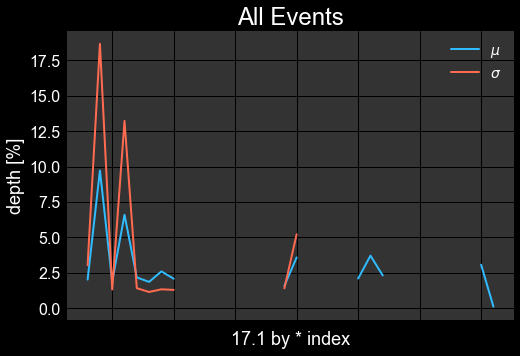

In [16]:
jedi.filter(regex='17.1 by \d+.\d Depth \[%\]').mean().plot()
jedi.filter(regex='17.1 by \d+.\d Depth \[%\]').std().plot()
plt.title('All Events')
plt.xlabel('17.1 by * index')
plt.ylabel('depth [%]')
plt.legend(['$\mu$', '$\sigma$'])

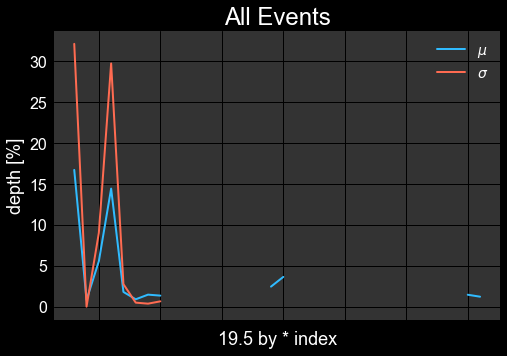

In [17]:
jedi.filter(regex='19.5 by \d+.\d Depth \[%\]').mean().plot()
jedi.filter(regex='19.5 by \d+.\d Depth \[%\]').std().plot()
plt.title('All Events')
plt.xlabel('19.5 by * index')
plt.ylabel('depth [%]')
plt.legend(['$\mu$', '$\sigma$'])